In [2]:
import numpy as np
import matplotlib.pyplot as plt

# TP2 :Mouvement Brownien ( Alia DRAME et Nossa IYAMU)

## Exercice 1 : Simulation du mouvement brownien

### Question 1 : Trajectoire du mouvement brownien standard


Le mouvement brownien standard est un processus stochastique avec des accroissements indépendants, stationnaires et gaussiens, et dont les trajectoires sont continues presque sûrement. La trajectoire d’un mouvement brownien standard B_t sur l’intervalle [0, T] peut être simulée en générant des incréments gaussiens et en cumulant ces incréments.

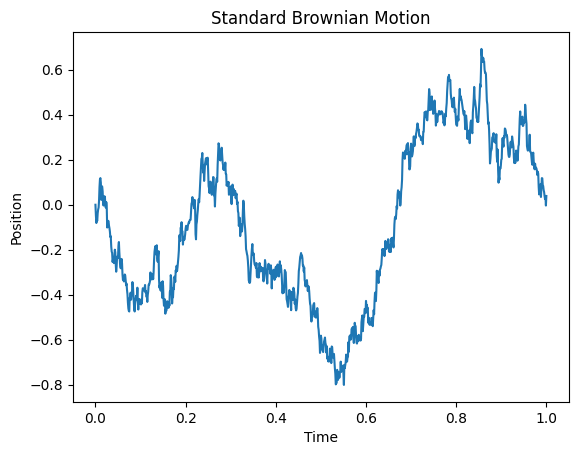

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def brownian_motion_standard(T, steps=1000):
    dt = T / steps
    increments = np.random.normal(0, np.sqrt(dt), steps)
    path = np.cumsum(increments)
    return np.concatenate(([0], path))

def plot_brownian_motion_standard(T, steps=1000):
    path = brownian_motion_standard(T, steps)
    time = np.linspace(0, T, steps + 1)
    plt.plot(time, path)
    plt.xlabel('Time')
    plt.ylabel('Position')
    plt.title('Standard Brownian Motion')
    plt.show()

# Trajectoire du mouvement brownien standard sur [0, T]
plot_brownian_motion_standard(1)

Cette figure montre la trajectoire d'un mouvement brownien standard sur l'intervalle $[0, 1]$. Les incréments sont gaussiens avec une moyenne de 0 et une variance proportionnelle au temps Δt. On observe les fluctuations aléatoires autour de la position initiale (0).

### Question 2 : Trajectoire du mouvement brownien avec drift et variance


Un mouvement brownien avec drift $\mu$ et variance $\sigma^2$ est un processus $X_t$ défini par $X_t = B_t + \mu$ t où $B_t$ est un mouvement brownien standard. Les incréments sont alors générés avec une moyenne $\mu \Delta t$ et une variance $\sigma^2 \Delta t$.

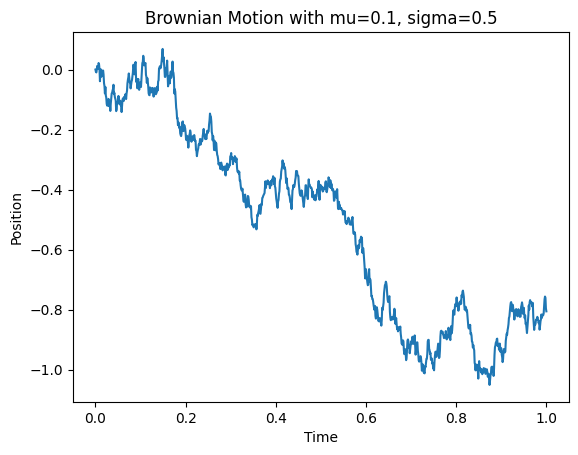

In [26]:
def brownian_motion(T, steps=1000, mu=0, sigma=1):
    dt = T / steps
    increments = np.random.normal(mu * dt, sigma * np.sqrt(dt), steps)
    path = np.cumsum(increments)
    return np.concatenate(([0], path))

def plot_brownian_motion(T, mu=0, sigma=1, steps=1000):
    path = brownian_motion(T, steps, mu, sigma)
    time = np.linspace(0, T, steps + 1)
    plt.plot(time, path)
    plt.xlabel('Time')
    plt.ylabel('Position')
    plt.title(f'Brownian Motion with mu={mu}, sigma={sigma}')
    plt.show()

# Trajectoire du mouvement brownien avec drift mu et variance sigma^2
plot_brownian_motion(1, mu=0.1, sigma=0.5)

Cette figure montre la trajectoire d’un mouvement brownien avec un drift $\mu = 0.1$ et une variance $\sigma^2 = 0.25$ sur l’intervalle [0, 1]. On observe que la trajectoire tend à s’élever légèrement en raison du drift positif tout en présentant des fluctuations dues à la variance.

### Question 3 : Trajectoire d’un mouvement brownien bidimensionnel


Un mouvement brownien bidimensionnel est un processus où chaque composante suit un mouvement brownien indépendant. Cela signifie que pour chaque composante, les incréments sont générés indépendamment.

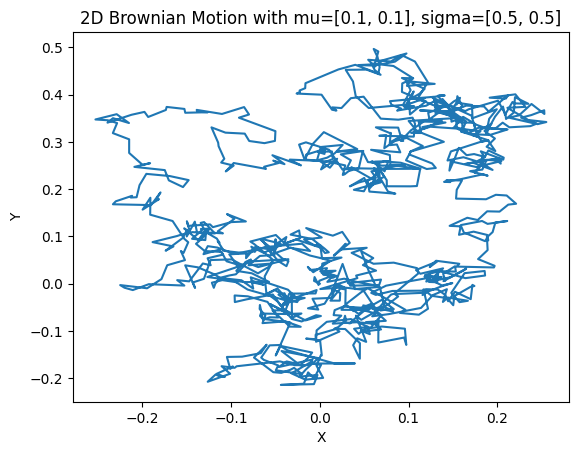

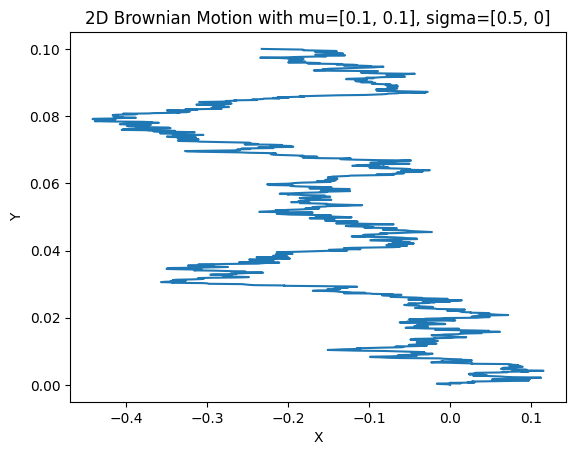

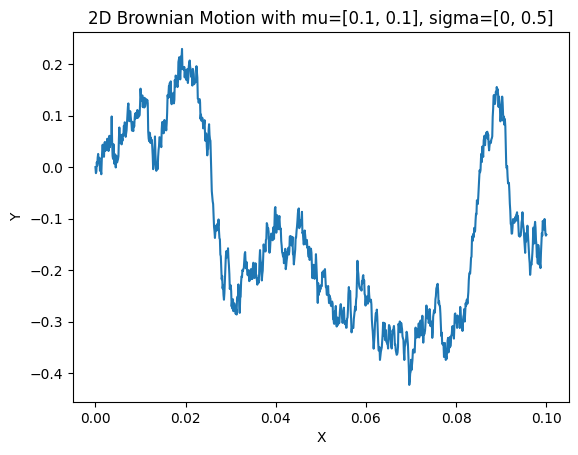

In [27]:
def brownian_motion_2D(T, steps=1000, mu=[0, 0], sigma=[1, 1]):
    dt = T / steps
    increments_x = np.random.normal(mu[0] * dt, sigma[0] * np.sqrt(dt), steps)
    increments_y = np.random.normal(mu[1] * dt, sigma[1] * np.sqrt(dt), steps)
    path_x = np.cumsum(increments_x)
    path_y = np.cumsum(increments_y)
    return np.concatenate(([0], path_x)), np.concatenate(([0], path_y))

def plot_brownian_motion_2D(T, mu=[0, 0], sigma=[1, 1], steps=1000):
    path_x, path_y = brownian_motion_2D(T, steps, mu, sigma)
    plt.plot(path_x, path_y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'2D Brownian Motion with mu={mu}, sigma={sigma}')
    plt.show()

# Trajectoire du mouvement brownien bidimensionnel
plot_brownian_motion_2D(1, mu=[0.1, 0.1], sigma=[0.5, 0.5])

plot_brownian_motion_2D(1, mu=[0.1, 0.1], sigma=[0.5, 0])

plot_brownian_motion_2D(1, mu=[0.1, 0.1], sigma=[0, 0.5])

Cette figure montre la trajectoire d’un mouvement brownien bidimensionnel avec des paramètres de drift $\mu = [0.1, 0.1]$ et de variance $\sigma = [0.5, 0.5]$ sur l’intervalle [0, 1]. Chaque composante suit un mouvement brownien indépendant, ce qui donne une trajectoire dans le plan 2D.
En assignant σ à 0 sur les autres figures on obtient  deux mouvements brownien avec drifts et variances monodimensionnels

# Exercice 2

# Exercice 3

On illustre un résultat incontournable à propos du mouvement brownien : c’est la limite d’échelle d’une marche aléatoire discrète ! Plus précisément, le théorème de Donsker peut s’énoncer de la manière suivante : soit $(X_n)_n$ une suite de variables aléatoires i.i.d. de carrés intégrables, centrées et réduites. On note $(S_n)_n$ la marche aléatoire associée

$$ S_n := \sum_{k=1}^n X_k $$

On interpole et normalise les trajectoires de cette marche aléatoire

$$ X_n(t) := \frac{1}{\sqrt{n}} \left( \sum_{k=1}^{\lfloor nt \rfloor} X_k + \{nt\} X_{\lfloor nt \rfloor + 1} \right) $$

$(X_n(t))_t$ est un variable aléatoire à valeurs dans $[0, 1]$, et elle converge en loi vers un mouvement brownien standard.


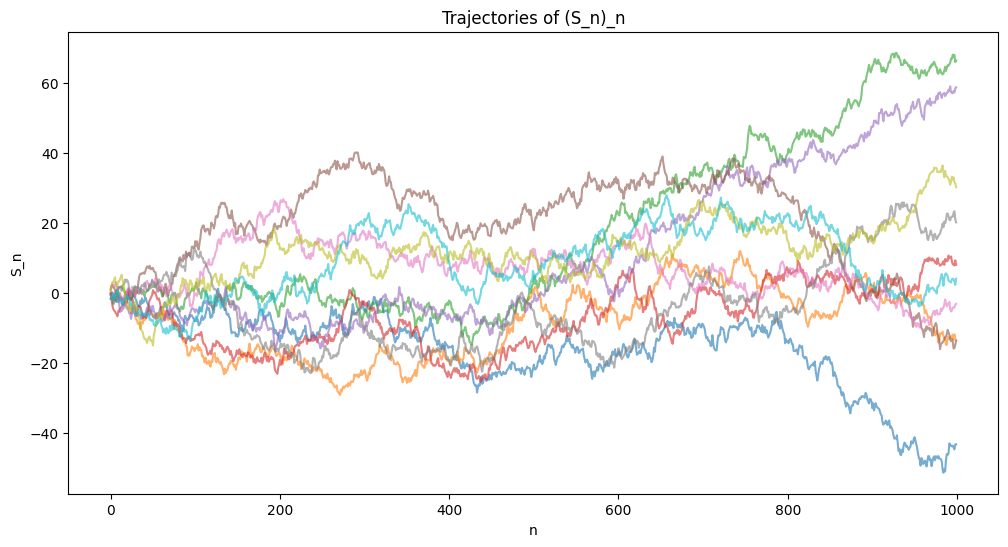

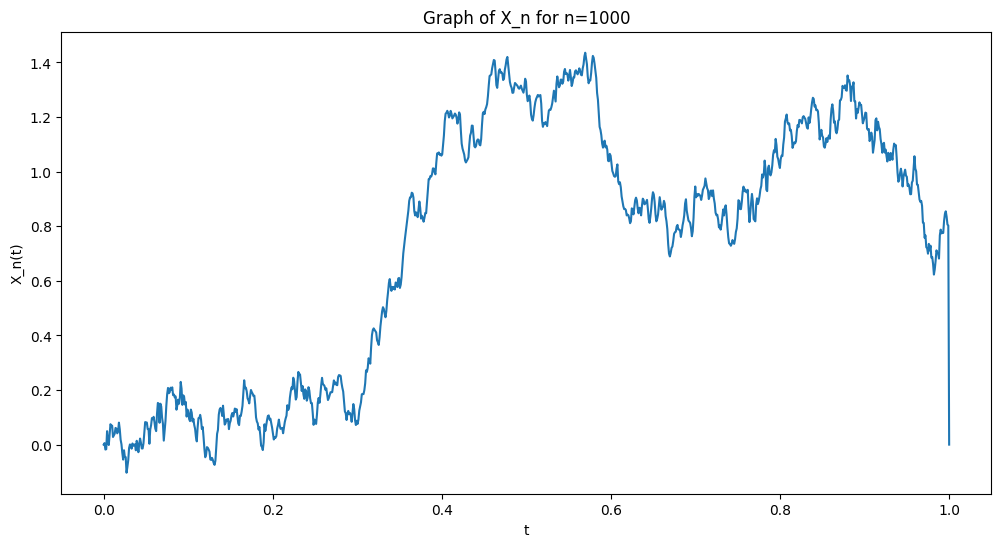

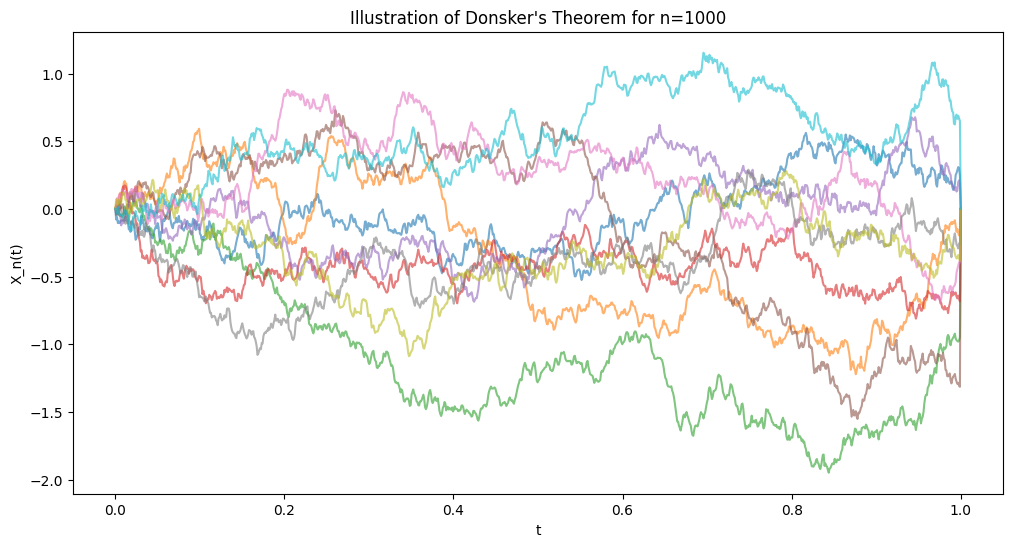

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1000  # Total number of steps for the random walk
n = 1000  # Number of steps for the interpolation
num_simulations = 10  # Number of simulations

# X est la suide de variables aléatoire i.i.d centrees reduites
# X_n_t est l'interpolation normalisee de la marche aleatoire

# 1. Plotting the trajectories of (S_n)_n
def simulate_random_walk(N):
    X = np.random.normal(0, 1, N)  # i.i.d. normal random variables
    S = np.cumsum(X)  # Cumulative sum to get S_n
    return S

plt.figure(figsize=(12, 6))
for _ in range(num_simulations):
    S = simulate_random_walk(N)
    plt.plot(S, alpha=0.6)
plt.title("Trajectories of (S_n)_n")
plt.xlabel("n")
plt.ylabel("S_n")
plt.show()

# 2. Plotting the graph of X_n
def interpolate_random_walk(n):
    t_values = np.linspace(0, 1, n)
    X = np.random.normal(0, 1, n)
    X_n_t = np.zeros_like(t_values)
    
    for i, t in enumerate(t_values):
        k = int(np.floor(n * t))
        frac = n * t - k
        if k < n:
            X_n_t[i] = (1 / np.sqrt(n)) * (np.sum(X[:k]) + frac * X[k])
    
    return t_values, X_n_t

t_values, X_n_t = interpolate_random_walk(n)

plt.figure(figsize=(12, 6))
plt.plot(t_values, X_n_t)
plt.title(f"Graph of X_n for n={n}")
plt.xlabel("t")
plt.ylabel("X_n(t)")
plt.show()

# 3. Illustrating Donsker's theorem
def simulate_donsker_theorem(n):
    t_values = np.linspace(0, 1, n)
    X_n_t = np.zeros((num_simulations, len(t_values)))
    
    for i in range(num_simulations):
        _, X_n_t[i, :] = interpolate_random_walk(n)
    
    return t_values, X_n_t

t_values, X_n_t = simulate_donsker_theorem(n)

plt.figure(figsize=(12, 6))
for i in range(num_simulations):
    plt.plot(t_values, X_n_t[i, :], alpha=0.6)
plt.title(f"Illustration of Donsker's Theorem for n={n}")
plt.xlabel("t")
plt.ylabel("X_n(t)")
plt.show()


## Étapes :
- Simule et trace les trajectoires de la marche aléatoire $S_n$
- Interpole et normalise la marche aléatoire pour obtenir $X_n(t)$ et la trace pour un $n$ fixe
- Simule et trace plusieurs trajectoires pour illustrer le théorème de Donsker pour un grand $n$


Analyse des figures:

Figure 1 :(question 1)

${Observations}$

Les trajectoires individuelles montrent des fluctuations autour de zéro, ce qui est cohérent avec la propriété que les variables $X_k$ sont centrées (moyenne nulle). Les écarts-types des trajectoires augmentent avec le nombre de pas $n$, illustrant la diffusion et la croissance quadratique de la variance, une caractéristique des processus de marche aléatoire.

$Interprétation$

Les trajectoires montrent la nature aléatoire des marches discrètes, avec des déviations plus importantes pour des valeurs plus élevées de $n$. Ces déviations illustrent le comportement diffusif typique des marches aléatoires, où la distance moyenne de la marche à l'origine augmente proportionnellement à la racine carrée du nombre de pas.


Figure 2 :(question 2)

$Observations$

La trajectoire fluctue autour de zéro, avec des variations de plus en plus marquées à mesure que $t$ augmente. La continuité de la trajectoire est maintenue, avec des fluctuations qui montrent une tendance à se diffuser plus largement pour des $t$ plus grands.

$Interprétation$

La trajectoire montre une convergence qualitative vers un mouvement brownien, où la variance augmente linéairement avec $t$. La normalisation par $sqrt{n}$ permet d'observer cette convergence en réduisant l'échelle des fluctuations en fonction de $n $, facilitant ainsi la comparaison avec un processus de Wiener.


Figure 3 :(question 3)

$Observations$

Les trajectoires montrent des fluctuations autour de zéro, avec des écarts-types qui augmentent avec $t$. La figure montre une densité accrue des trajectoires près de zéro au début $(  t \approx 0  )$ et une dispersion croissante à mesure que $t$ augmente.

$Interprétation$

Cette convergence vers un processus de Wiener est illustrée par la similarité des trajectoires, qui présentent des caractéristiques statistiques du mouvement brownien, comme l'indépendance des incréments et la continuité. Les trajectoires se dispersent de manière cohérente avec une croissance quadratique de la variance, $ \mathbb{E}[B_t^2] = t $ pour un processus brownien standard $ B_t $.


# Exercice 4

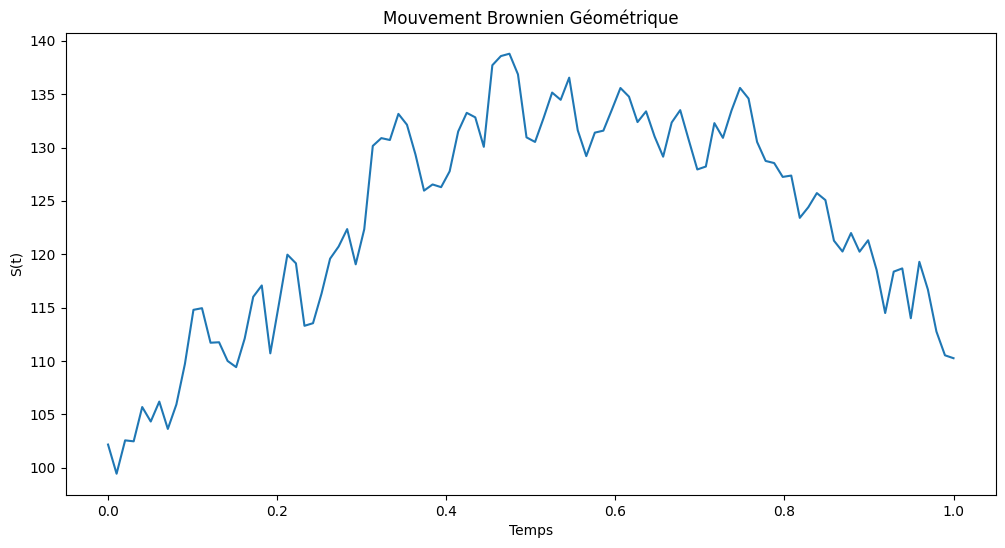

In [23]:
# Parameters
S0 = 100  # Initial value
mu = 0.1  # Drift coefficient
diff = 0.2  # Diffusion coefficient
T = 1.0  # Time horizon
dt = 0.01  # Time step
N = int(T / dt)  # Number of steps
t = np.linspace(0, T, N)

Bt = np.random.normal(0, np.sqrt(dt), N).cumsum()

def geometric_borwnian_motion(S0, Bt, mu, diff):
    
    """
    Process of a geometric brownian motion

    Parameters:
    S0 (float): Initial value of the process.
    Bt (array) : Brownian motion drifted by mu with diffusion coefficient diff
    mu (float) : drift coefficient
    diff (float) : diffusion coefficient

    Returns:
    array: Trajectory of the geometric brownian motion process.
    """

    t = len(Bt)
    St = S0 * np.exp( mu * t - (diff/2) * t + diff * Bt )
    return St

S = geometric_borwnian_motion(S0, Bt, mu, diff)

plt.figure(figsize=(12, 6))
plt.plot(t, S)
plt.title("Mouvement Brownien Géométrique")
plt.xlabel("Temps")
plt.ylabel("S(t)")
plt.show()

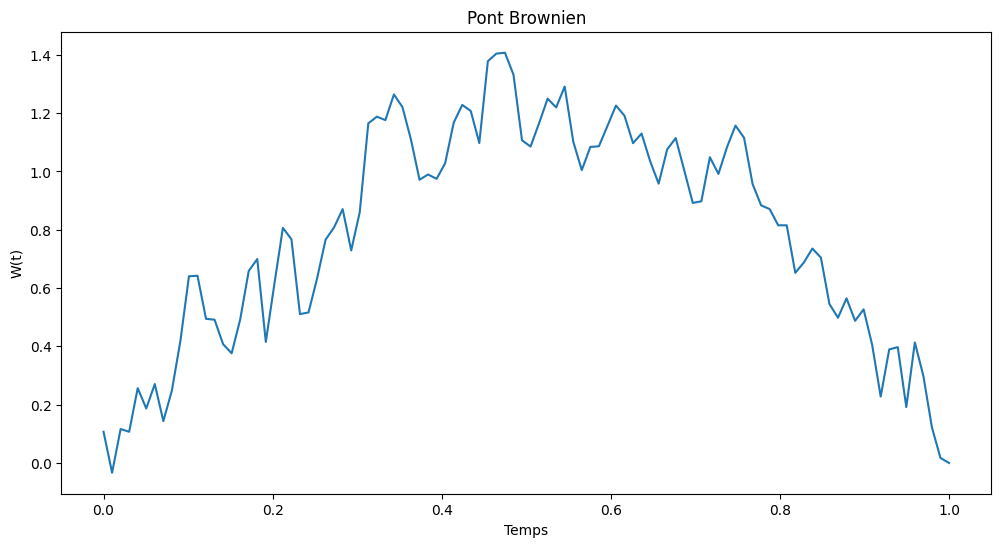

In [24]:
# Construct the Brownian bridge
W = Bt - (t / t[-1]) * Bt[-1]

plt.figure(figsize=(12, 6))
plt.plot(t, W)
plt.title("Pont Brownien")
plt.xlabel("Temps")
plt.ylabel("W(t)")
plt.show()